<a href="https://colab.research.google.com/github/ChinthakindhiNishitha/ML-LAB/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("mathchi/diabetes-data-set")

print("Path to dataset files:", path)
print("Files inside dataset folder:", os.listdir(path))

df = pd.read_csv(os.path.join(path, "diabetes.csv"))
df


Path to dataset files: /kaggle/input/diabetes-data-set
Files inside dataset folder: ['diabetes.csv']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1



Model Accuracy: 0.71

Confusion Matrix:
[[82 18]
 [26 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



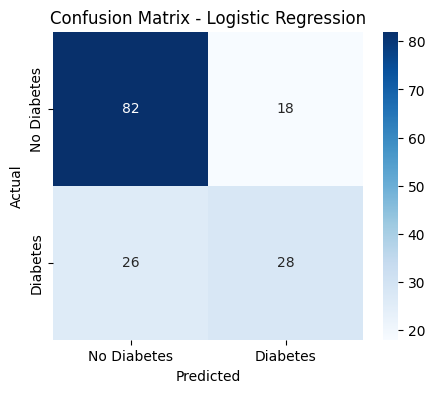

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes","Diabetes"], yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()



Confusion Matrix:
[[82 18]
 [26 28]]

--- Scikit-learn Metrics ---
Accuracy: 0.7142857142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


--- Manual Metrics (from formulas) ---
Accuracy: 0.71
Precision: 0.61
Recall (Sensitivity): 0.52
Specificity: 0.82
F1 Score: 0.56


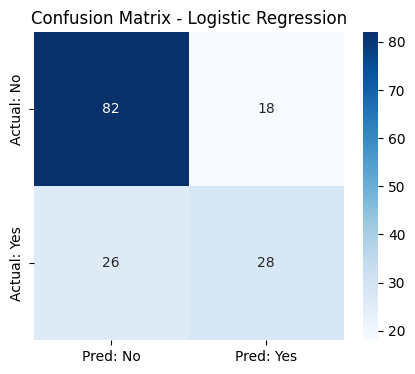

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("\nConfusion Matrix:")
print(cm)

print("\n--- Scikit-learn Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
accuracy_manual = (tp + tn) / (tp + tn + fp + fn)
precision_manual = tp / (tp + fp) if (tp + fp) > 0 else 0
recall_manual = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual) if (precision_manual + recall_manual) > 0 else 0
specificity_manual = tn / (tn + fp) if (tn + fp) > 0 else 0

print("\n--- Manual Metrics (from formulas) ---")
print(f"Accuracy: {accuracy_manual:.2f}")
print(f"Precision: {precision_manual:.2f}")
print(f"Recall (Sensitivity): {recall_manual:.2f}")
print(f"Specificity: {specificity_manual:.2f}")
print(f"F1 Score: {f1_manual:.2f}")
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred: No", "Pred: Yes"],
            yticklabels=["Actual: No", "Actual: Yes"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()